# Parent's Educational Attainment and its Effect on Child Intelluctual Development for Mathematics
*Jack Yao, Jessie Lu, Kexin Feng, Vincent Luong*

# Group Project
# Parent's Educational Attainment and its Effect on Child Intellectual Development for Mathematics

*Jack Yao, Jessie Lu, Kexin Feng, Vincent Luong*

# Introduction

Student Performance is a general term used to describe how well a student has mastered what is taught in school. In our experiment, we simply use the sum of students' grades to quantify student performance in a specific subject (mathematics). Numerous factors contribute to student performance; The study (Mammarella et al., 2019) [(2)](#ref_2) explores the impact of parents' attitudes and behaviors towards math on children's math performance. It indicates that parents majoring in elementary education tend to have higher math anxiety than those attending college. Our research is inspired by these findings, aiming to investigate the relationship between parental education and children's math performance.

The dataset (2014)[(1)](#ref_1) that will be used in this project is the Student Performance on Math dataset from the UCI machine learning repository. This project classified parents’ level of education into two groups, based on the sum of both parents’ education levels.  If the sum of both parents’ level of education is $\geq$ 6, we classified them as “well-educated”, or else they are “less-educated”. The measured student performance is reflected in grades on a numeric scale from 0 to 20. 

### Research Question:
Do parents' educational attainment impact the academic performance of the student?

$H_0: \mu_1 - \mu_2 = 0$

$H_1: \mu_1 - \mu_2 > 0$

$\mu_1$: Student performance of well-educated parents’ group.

$\mu_2$: Student performance of less-educated parents’ group. 

# Preliminary Results

This section will involve:
- Reading data from UCI database
- Cleaning and wrangling data
- Plotting relevant raw data
- Computing point estimates

In [1]:
# load libraries and set seed
set.seed(8888)
library(tidyverse)
library(tidymodels)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Reading and cleaning data from database

In [2]:
# Reading data from UCI Machine Learning Repository and extract CSV file from zip file
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
download.file(url, "./data/studentperformance.zip")
raw_data <- unzip("./data/studentperformance.zip", "student.zip", exdir = "./data") |>
    unzip("student-mat.csv", exdir = "./data") |>
    read_delim(delim = ";")

# Refactoring column names
student_data <- raw_data |>
    select(Medu, Fedu, G1, G2, G3)
colnames(student_data) <- c("mother_education", "father_education", "term_1_grade", "term_2_grade", "final_grade")

head(student_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mother_education,father_education,term_1_grade,term_2_grade,final_grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,5,6,6
1,1,5,5,6
1,1,7,8,10
4,2,15,14,15
3,3,6,10,10
4,3,15,15,15


### Plotting and analyzing relevant data

Seen from documentation of the dataset [(1)](#ref_1), the mother's and father's education levels are as follows:

|Score|Education level|
|-|-|
|$0$|None|
|$1$|up to 4th grade|
|$2$|5th to 9th grade|
|$3$|Secondary education|
|$4$|Postsecondary education|

Below are plots of the distribution of the parents' education scores:

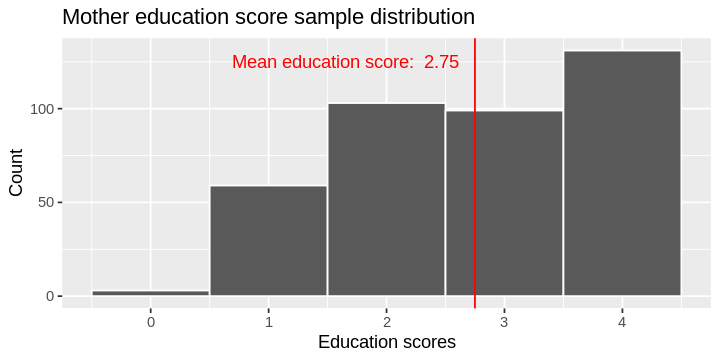

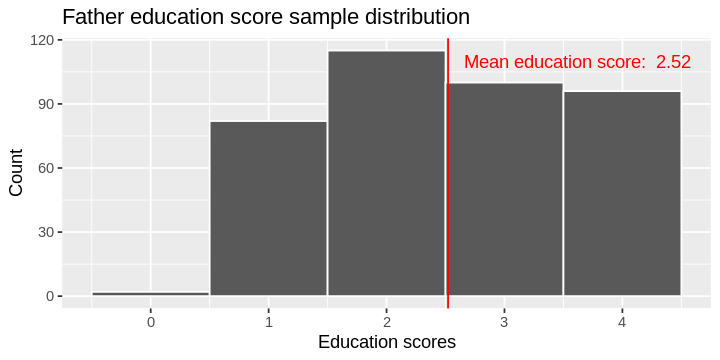

In [3]:
options(repr.plot.width = 6, repr.plot.height = 3)

mother_education_plot <- student_data |>
    ggplot(aes(x = mother_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(mother_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$mother_education), digits = 2)), 
             x = mean(student_data$mother_education) - 1.1, y = 125, color = 'red') +
    ggtitle("Mother education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")


father_education_plot <- student_data |>
    ggplot(aes(x = father_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(father_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$father_education), digits = 2)), 
             x = mean(student_data$father_education) + 1.1, y = 110, color = 'red') +
    ggtitle("Father education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")

mother_education_plot
father_education_plot

From the plots above, we observed that they differ slightly in the shape, but otherwise share similar characteristics; there are very little observations of parents with "no education level" and most of the observations tend towards the upper end with both centers about the score of $2.6$. With no apparent abnormalities in the distribution, `mother_education` and `father_education` can be used as explanatory variables further in the analysis.

Referring again to the documentation [(1)](#ref_1), the all three of a student's grades are integers in the interval $[0, 20]$.
Below are plots of the distribution of students' first, second, and final grades:


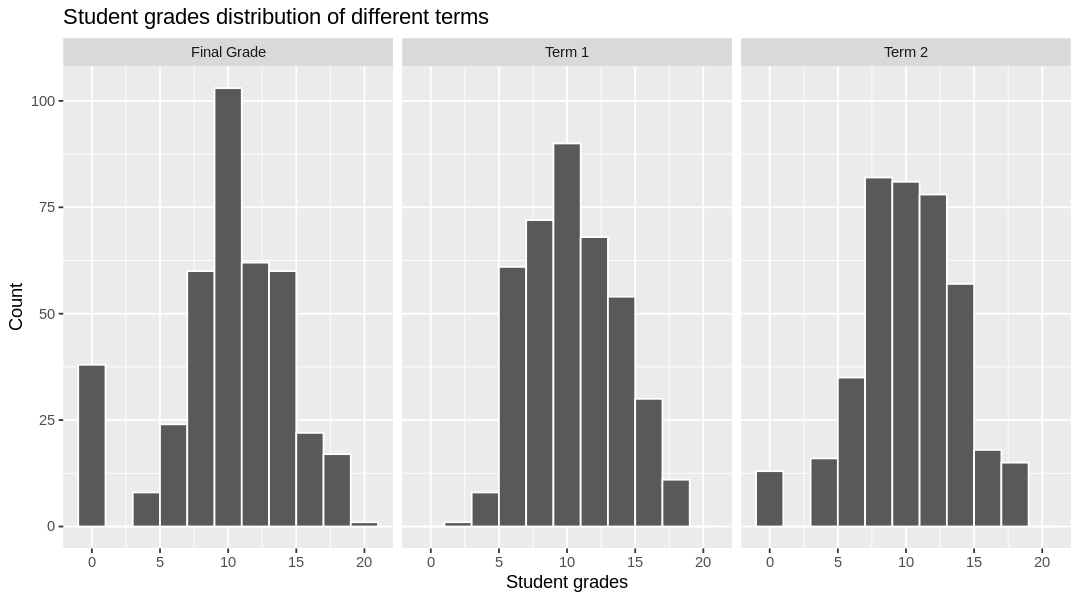

In [8]:
options(repr.plot.width = 9, repr.plot.height = 5)

labels = c(`term_1_grade` = "Term 1", `term_2_grade` = "Term 2", `final_grade` = "Final Grade")

student_grade_plot <- student_data |>
    pivot_longer(names_to = "term", values_to = "grade", cols = c(term_1_grade, term_2_grade, final_grade)) |>
    ggplot(aes(x = grade)) +
    facet_wrap(vars(term), labeller = as_labeller(labels)) +
    geom_histogram(binwidth = 2, color = 'white') +
    ggtitle("Student grades distribution of different terms") +
    xlab("Student grades") +
    ylab("Count")

student_grade_plot

Seen from the three plots above, it seems that most of the distributions seem relatively normal with center around $10$. However, looking at `Final Grade` and `Term 2`, there appears to be an increasing frequency for grades of $0$. Below is an overview of those with a final grade of $0$:

In [5]:
student_data |>
    filter(final_grade == 0) |>
    mutate(average_term_grades = (term_1_grade + term_2_grade)/2) |>
    head(10)

mother_education,father_education,term_1_grade,term_2_grade,final_grade,average_term_grades
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,7,4,0,5.5
3,4,12,0,0,6.0
1,1,8,0,0,4.0
3,4,9,0,0,4.5
4,4,11,0,0,5.5
3,4,10,0,0,5.0
3,3,4,0,0,2.0
4,3,7,9,0,8.0
2,1,5,0,0,2.5


Observing the overview, it can be seen that those with a final grade of $0$ tend to also have "relatively poorer" grades in the preceding two terms. As the significance of $0$ wasn't documented in the original data, it's difficult to determine whether it represents missing/null data or other holistic factor such as failing by not reaching a certain cutoff. Due to this uncertainty, the mean of all three grades will be used to represents the student's grade to mitigate severe skewness. Below is the distribution of mean grades of students (which appears more normally distributed with no outliers):

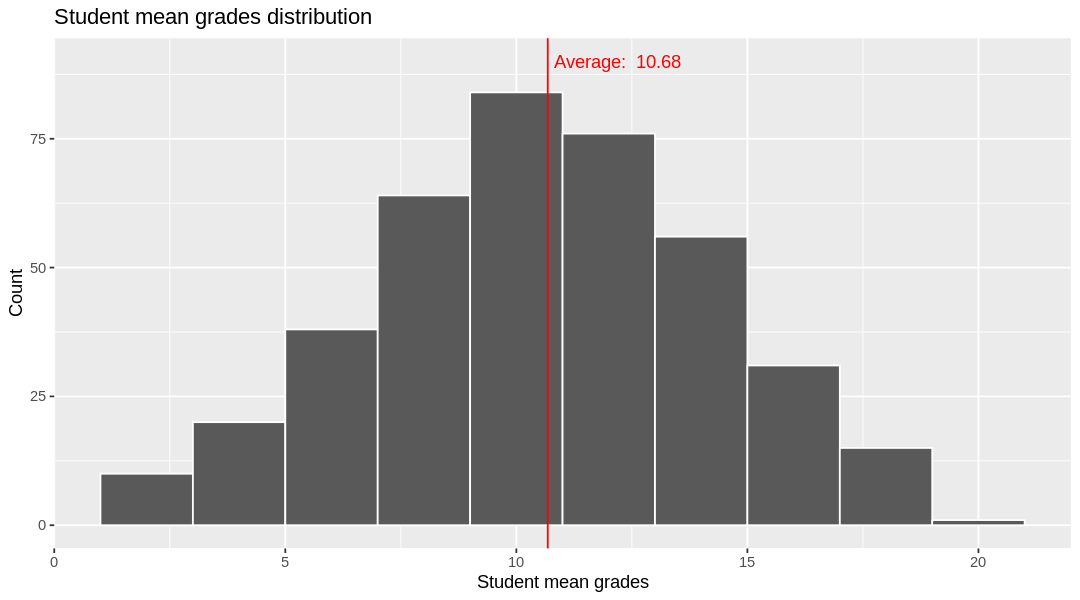

In [9]:
options(repr.plot.width = 9, repr.plot.height = 5)

student_data <- student_data |>
    mutate(average_grade = (term_1_grade + term_2_grade + final_grade) / 3)

student_grade_plot <- student_data |>
    ggplot(aes(x = average_grade)) +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(aes(xintercept = mean(average_grade)), color = 'red') +
    annotate("text", label = paste("Average: ", round(mean(student_data$average_grade), digits = 2)), 
             x = mean(student_data$average_grade) + 1.5, y = 90, color = 'red') +
    ggtitle("Student mean grades distribution") +
    xlab("Student mean grades") +
    ylab("Count")

student_grade_plot

# Methods: Plan

### Preliminary  Informaton

- Analyzing our dataset, we found our students to have been sampled from 2 different schools, so it should be mentioned that there could be some bias from schools for the `average_term_grade` of students that can skew our results, however, our goal is to test parental education levels and whether it increases/decreases the student's performance in mathematics and not to consider the outside education environment within these factors.  Therefore in our project, it is assumed that both schools provide the same education level (even thought it can be a major factor in determining student performance).  

- While doing further research about our topic, we found that there appears to be a relation between low education level and math anxiety; parents with lower education levels, tend to have high math anxiety which could be passed down to children impacting their performance in mathematics (Herts et al., 2019)  [(2)](#ref_2), math anxiety is not mentioned in our dataset, but it should be mentioned that anxiety could be an underlying factor to low-performance if there exists a relationship.

- We are declaring that if the combined sum of both parent's education level is $\geq 6$, then they are to be considered as well-educated in our dataset.  It is not statistically correct to assume that post-secondary is the educational standard in this data, therefore, we wanted to analyze the distributions of sample means of average education level to determine our basis for what counts as a high-education.  As measured in the preliminary results above, we recieved that the average education level of a parent is approximate $2.6$ (for both father and mother), so using the $\geq 6$ as a basis would consider both parents that have recieved secondary education (slightly above-average education), as **well-educated**.  

### What do you expect to find
Through statistical analysis and inference, we expect to find if there exists sufficient evidence to prove/disprove whether the parent's (combined) education level plays a critical role in a student's performance in mathematics.

### What impact could such findings have?

Discovering whether there is enough evidence to confidently claim/refute whether a child will perform higher based on their parent's education level will lead to a better understanding in the social dynamic of a family; more/less parents of a family could be seeking for higher education.

### What future questions could this lead to?

Topics, such as, the importance of parental education and its affect on a child's intellectual delveopment for other subjects will be questioned.  Questions of should more/less parent's be seeking higher education and what will better help a child's intellectual development will arise.

### Preliminary  Information

- It is not statistically correct to assume that post-secondary is the educational standard in this data, therefore, we wanted to analyze the distributions of average education level to determine our basis for what counts as a high-education.  As measured in the preliminary results above, we received that the average education level of a parent is approximate $2.6$ (for both father and mother), so using the $\geq 6$ as a basis would consider both parents that have received secondary education or higher (slightly above-average education), as **well-educated**.  

- Analyzing our dataset, we found our students to have been sampled from 2 different schools, so it should be mentioned that there could be some potential bias from schools for the `average_term_grade` of students that can skew our results, however, our goal is to test parental education levels and whether it affects the student's performance in mathematics and not to consider the outside education environment within these factors.  Therefore in our project, it is assumed that both schools provide the same education level (even though it can be a major factor in determining student performance).  


### Expectations/Impacts/Future Questions.
 
 Through statistical analysis and inference, we expect to find if there exists sufficient evidence to prove/disprove whether the parent's (combined) education level plays a critical role in a student's performance in mathematics, which will lead to a better understanding in the social dynamic of a family.  The importance of parental education and its effect on a child's intellectual development for other subjects will be questioned.  Questions of should more/less parent's be seeking higher education and what will better help a child's intellectual development will arise.


# References

1. <a id='ref_1'></a> Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

2. <a id='ref_2'></a> Herts, J. B., Beilock, S. L., & Levine, S. C. (2019). The role of parents’ and teachers’ math anxiety in Children’s math learning and attitudes. In I. C. Mammarella, S. Caviola & A. Dowker (Eds.), *Mathematics anxiety* (1st ed., pp. 190-210). Routledge. https://doi.org/10.4324/9780429199981-11

1. <a id='ref_1'></a>Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T. <br>
2. <a id='ref_2'></a>Herts, J. B., Beilock, S. L., & Levine, S. C. (2019). The role of parents’ and teachers’ math anxiety in Children’s math learning and attitudes. In I. C. Mammarella, S. Caviola & A. Dowker (Eds.), *Mathematics anxiety* (1st ed., pp. 190-210). Routledge. https://doi.org/10.4324/9780429199981-11